<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# AIPI 520 Final Exam
Important notes:  
1) You may NOT import any packages which are not already imported for you (no exceptions to this).  
2) You may NOT change any code except in the areas designated for you to write your code
3) You may NOT use AI assistants on any of the written response problems.

Good luck!

In [1]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'communities.csv':'https://storage.googleapis.com/aipi_datasets/communities.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [2]:
import numpy as np
import pandas as pd

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Question 1 [17 pts]
Please answer the following questions with brief answers of no more than 2-3 sentences:

### Q1.1 (4 points)
Explain in no more than 2-3 sentences the intuition behind how a tree model chooses the splitting attribute and value for each node.  Your explanation must contain words, not equations.

YOUR ANSWER HERE:

The goal of decision trees is to build the most efficient tree, which is a tree that successfully splits the data using the minimum number of splits. To do so, the objective is to maximize the information gain, or minimize the impurity (classification) or MSE (regression), at each split in the tree. The value for each node is calculated by either entropy (0 being perfectly pure and 1 being perfectly impure) or Gini impurity (0 being perfectly pure and 0.5 being perfectly impure).

### Q1.2 (2 points)
We have trained a tree model for a regression problem.  Explain how our tree model now generates predictions on new data using the tree?

YOUR ANSWER HERE:

Predictions are made using a decision tree by traversing the tree, reaching a decision at each node. The input data will follow a path based on the features of the data and the decisions at each node. This will continue until the input reaches the final "leaf" node which represents the predicted value or class that the input data falls into.

### Q1.3 (3 points)
Why do we often use a random forest rather than a single decision tree?  What is a disadvantage of a random forest relative to using a single tree?

YOUR ANSWER HERE:

Decision trees tend to overfit data and can be sensitive to noise. Random forest gives us the ability to grow several trees and take the majority vote by using a bagging technique to ensure that each tree is independent and trained on a different subset of data. This can help improve accuracy, reduce variance, and handle complex relationships better; however, it can also make it more difficult to interpret and require more computational resources and time.

### Q1.4 (2 points)
If we have created a boosted ensemble model using AdaBoost, how do we use it to generate predictions for new data?

YOUR ANSWER HERE:

To generate predictions for new data using a boosted ensemble model using AdaBoost, we first pass the data through each weak learner, which focus on the misclassifications of previous learners. Next, we calculate individual predictions for each of the weak learners and aggregate the predictions based on the weights assigned for each learner. Finally, we make predictions determined by the aggregated results, which can either be classficiation or regression.

### Q1.5 (3 points)
Describe a scenario where using a boosting model with a decision stump as the base estimator would very likely produce poor results, relative to a boosting model using other types of algorithms for the base estimator.  Why would the boosting model using a decision stump perform poorly in this scenario?

YOUR ANSWER HERE:

One scenario where using a boosting model with a decision stump as the base estimator would likely produce poor results would be when the target variable is heavily influenced by the interaction of several features, for example a model that predicts the likelihood of developing certain phenotypes. This is because decision stumps can only make decisions based on a single feature at a time and with boosting they iteratively focus on correcting the mistakes of previous stumps. Therefore, they would be incapable of capturing the complex, multi-dimensional relationships present in the data.

### Q1.6 (3 points)
What are 3 key differences between boosting ensemble models and bagging ensemble models?

YOUR ANSWER HERE:

First, in boosting ensemble models weak learners are trained on the full dataset and learn from the mistakes of previous learners, while bagging weak learners are trained on random subsets with replacement and trained close to independently. Second, in boosting the final prediction is the weighted average or additive combination of all learners, while bagging final predictions is the simple average or majority vote. Finally, boosting efficiency is low as it is trained in series and more likely to overfit, while bagging training efficiency is high as it is trained in parallel and less likely to overfit.

## Question 2 [19 pts]
Please answer the following questions with brief answers of no more than 2-3 sentences:

### Q2.1 (3 pts)
The perceptron and logistic regression are both considered types of artificial neurons.  What are the main difference(s) between them?

YOUR ANSWER HERE:

The perceptron provides binary outputs and discrete predictions by passing it through a threshold, while logistic regression provides either probabilistic or discrete predictions by using a sigmoid function to ouput values between 0 and 1. This represents the probability belonging to a class, and if we want discrete predictions, we pass through a threshold afterward. Furthermore, the perceptron updates its weights based only on misclassfied points, while logisitc regression uses a cost function and gradient descent to minimize the cost function.

### Q2.2 (3 pts)
What benefit do we get when we combine many logistic regression units (or units with another activation function) into a neural network, rather than just using a single logistic regression unit?

YOUR ANSWER HERE:

It allows for much more complex calculations including handling non-linear relationships, a very large number of features, and unstructured data. Furthermore, we have the ability to customize the architecture of the neural network and it requires little to no feature engineering.

### Q2.3 (3 pts)
What does backpropagation mean and why do we use it to train a neural network?

YOUR ANSWER HERE:

Backpropogation is used to train a neural network to update the weights for each feature, giving us the ability to minimize loss and generate accurate predictions. It works by first allowing for a forward propogation to calculate error by using the cost function, and then working in reverse order to distribute the total output error among each layer. We calculate the derivative of the cost with respect to each weight and update the weights using gradient descent.

### Q2.4 (3 pts)
What does the learning rate do while training a neural network?  Why is it so important to set it within the right range for the problem – specifically, what happens when it is set too high, and when it is set too low?

YOUR ANSWER HERE:

The learning rate is a hyperparameter that controls the size of the steps taken when updating the weights of a neural network. A learning rate that is too high risks overshooting the optimal weight values and not convering. A learning rate that is too low causes the optimization process to be very slow, and could lead to convergence at a local minima (suboptimal).

### Q2.5 (3 pts)
List three reasons why we might choose NOT to use a neural network and instead use a different algorithm?

YOUR ANSWER HERE:

Neural networks can be very computationally expensive and resource intensive, and therefore, if we have limited resources we may choose a different algorithm. Second, neural networks can be difficult to interpret, so if interpretability is a big concern we may choose a different algorithm. Third, neural networks can overfit, particularly on small amounts of data, so if we have a small dataset another algorithm may be more suitable.

### Q2.6 (4 pts)
When we have a multi-class, single-label classification problem, how do we make the final prediction of the target label, given the outputs of the neural network?  How does this process differ if we have a multi-class, multi-label problem instead?

YOUR ANSWER HERE:



## Question 3 [10 pts]


### Q3.1 (4 points)
Provide a real-world example of when clustering would be used.  Explain why clustering would be used instead of a supervised machine learning method.

YOUR ANSWER HERE

### Q3.2 (6 points)
Explain in a short paragraph how K-Means clustering and Agglomerative Hierarchical clustering differ in how they each form groups from the datapoints.

YOUR ANSWER HERE

## Question 4 [28 pts]
For this question we are going to examine factors which correlate to higher per-capita violent crime rates in communities across the U.S.  We have a large number of possible features to use (122) which include demographic data as well as data about police presence in the communities.  Refer to [this site](https://archive.ics.uci.edu/ml/datasets/communities+and+crime) for the explanation of each of the features included.

All numerical features (excluding the state, county and community codes) have been normalized to the range [0,1].  Additionally, outliers were removed by setting all values 3 standard deviations or more above the mean to 1 and all values 3 standard deviations or more below the mean to 0.

Note: the target variable we are predicting is the rate of **reported crime** (which is not necessarily equal to the rate of actual crime.

In [3]:
# Read data in and clean up
crimes = pd.read_csv('communities.csv',na_values=['?'])
crimes.drop(columns=['state','country','community','communityname','fold'],inplace=True)
crimes.fillna(crimes.mean(),inplace=True)
print(crimes.shape)
crimes.head()

(1994, 123)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [4]:
X = crimes.iloc[:,:-1]
y = crimes.iloc[:,-1]

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

### Q4.1
Let's start by using a linear regression model on the dataset.  In the cell below, use the training data to train a linear regression model, and return the trained linear model and the MSE on the test set.  Then follow the below instructions to create the plot, and then answer the question below.

In [8]:
def run_linmodel(X_train,y_train,X_test,y_test):
    '''
    Trains a linear regression model and calculates the MSE on the test set

    Inputs:
        X_train(pd.DataFrame): dataframe containing the training set inputs
        y_train(pd.DataFrame): dataframe containing the training set labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels

    Returns:
        linmodel(sklearn.linear_model.LinearRegression): trained model
        test_mse(float): MSE on the test set
    '''
    # YOUR CODE HERE
    # Initialize and train linear regression
    linmodel = LinearRegression()
    linmodel.fit(X_train, y_train)

    # Make predictions
    y_pred = linmodel.predict(X_test)

    # Calculate MSE
    squared_errors = (y_test - y_pred) ** 2
    test_mse = squared_errors.mean()

    return linmodel, test_mse



In [9]:
# Get test set predictions using your linear model
lnmodel, mse = run_linmodel(X_train,y_train,X_test,y_test)

print('The test set MSE of your model is {:.4f}'.format(mse))

The test set MSE of your model is 0.0209


Use the cell below to create a plot of the residuals (errors) versus the predicted values for the **training data**.  Then, answer the question below, referring to your plot to support your answer.

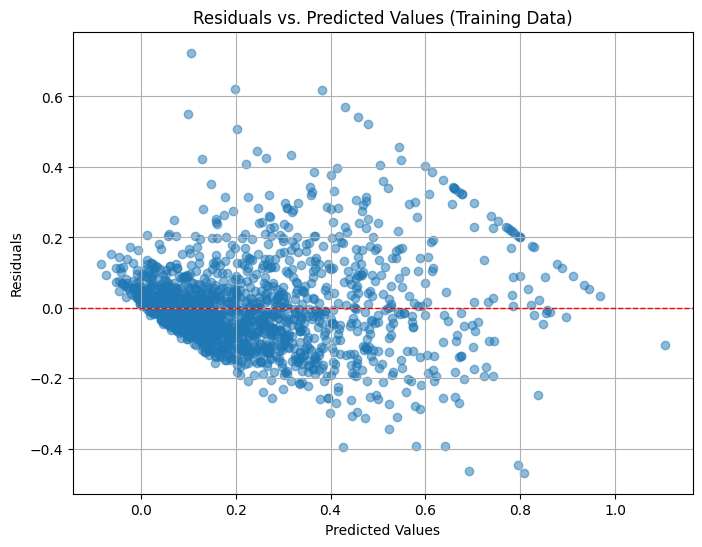

In [11]:
# YOUR CODE HERE
# Get the predicted values on the training data
y_train_pred = lnmodel.predict(X_train)

# Calculate the residuals (errors)
residuals = y_train - y_train_pred

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Training Data)")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

### Q4.1 (6 points)
1)  Does the assumption of linearity between the feature set and target generally appear to hold?  Explain your answer by referring to your plot.  If your answer is “no”, what should we do to potentially improve the fit of our linear regression model?  

3)	Does the assumption of constant variance of errors (homoscedasticity) hold?  Defend your answer by referring to your plot.

YOUR ANSWER HERE

### Q4.2
Complete the function `build_shallow_tree()` which creates a shallow decision tree model from the training data using `max_depth=2` and `random_state=0`, and then calculates its MSE on the test set.  You should fit your tree to the training data and then return the fitted tree model and the test set MSE.  Then run the cell below to dispay the tree and answer the question below

In [12]:
def build_shallow_tree(X_train,y_train,X_test,y_test):
    '''
    Trains a tree model with max_depth=2 on the data

    Inputs:
        X_train(pd.DataFrame): dataframe of the training data inputs
        y_train(pd.DataFrame): dataframe of the training data labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels

    Returns:
        tree_model(sklearn.tree.DecisionTreeRegressor): trained tree model
        test_mse(float): the MSE on the test set
    '''
    # YOUR CODE HERE
    # Initialize a shallow decision tree model
    tree = DecisionTreeRegressor(max_depth=2, random_state=0)

    # Fit the tree to the training data
    tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = tree.predict(X_test)

    # Calculate the Mean Squared Error (MSE) manually
    squared_errors = (y_test - y_pred) ** 2
    test_mse = squared_errors.mean()

    return tree, test_mse

MSE on the test set: 0.029


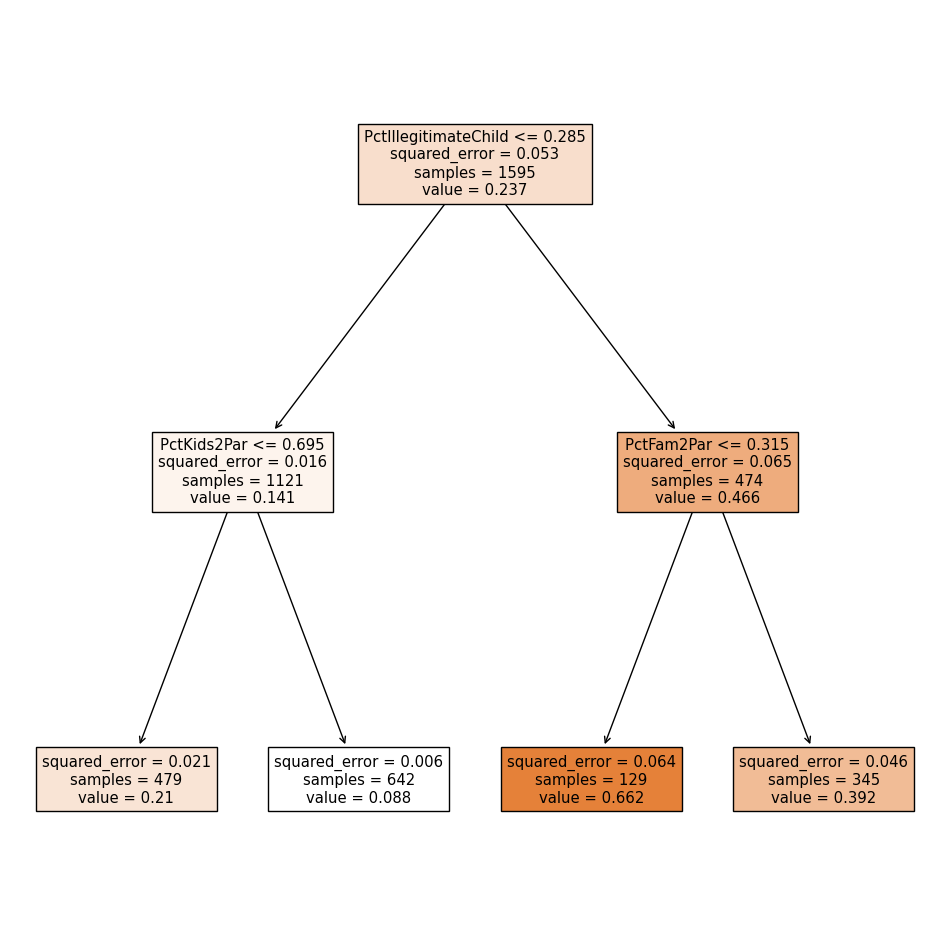

In [13]:
# Run cell to display your tree
tree, test_mse = build_shallow_tree(X_train,y_train,X_test,y_test)

print('MSE on the test set: {:.3f}'.format(test_mse))
plt.figure(figsize=(12,12))
plot_tree(tree,feature_names=list(X.columns),filled=True)
plt.show()

### Q4.2 (4 points)
Based on the 2-layer tree you created, which criteria (features and values) result in the smallest per-capita rate of violent crime in a community?  Out of the number of communities in the training set, how many of them were predicted by your model to have this lowest per-capita violent crime rate?

YOUR ANSWER HERE

### Q4.3 [6 points]
Let's now try a random forest model.  Complete the function `run_rf_model()` which takes the training and test sets as inputs as well as lists of possible values to evaluate for the hyperparameters `min_samples_leaf` and `max_features`.  Your function should use cross-validation (you can use `cross_val_score` with 3-fold cross-validation and `neg_mean_squared_error` as the scoring metric) to determine the optimal values for `min_samples_leaf` and `max_features` from among the options in the input lists.  When instantiating the `RandomForestRegressor` be sure to use `random_state=0` and keep everything at the default settings except the two hyperparameters you are optimizing.  After you have found the optimal vlaues for `min_samples_leaf` and `max_features` (from the input lists), retrain your optimized model and calculate its performance on the test set.

NOTE: you MAY NOT use `GridSearchCV` on this question.

In [14]:
def run_rf_model(X_train,y_train,X_test,y_test,minsamplesleaf_vals,maxfeatures_vals):
    '''
    Trains a random forest model using the optimal values for min_samples_leaf and max_features from the input lists

    Inputs:
        X_train(pd.DataFrame): dataframe of the training data inputs
        y_train(pd.DataFrame): dataframe of the training data labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels
        minsamplesleaf_vals(list): list of values to evaluate for min_samples_leaf hyperparameter
        maxfeatures_vals(list): list of values to evaluate for max_features

    Returns:
        best_rf(sklearn.ensemble.RandomForestRegressor): trained random forest model using the optimal min_samples_leaf and max_features values
        test_mse(float): the MSE on the test set
    '''
    # YOUR CODE HERE
    # Initialize variables
    best_mse = float('inf')
    best_min_samples_leaf = None
    best_max_features = None

    # Loop through hyperparameters
    for min_samples_leaf in minsamplesleaf_vals:
        for max_features in maxfeatures_vals:
            # Initialize Random Forest model with specified hyperparameters
            rf_model = RandomForestRegressor(
                min_samples_leaf=min_samples_leaf,
                max_features=max_features,
                random_state=0
            )

            # Perform cross-validation to find the optimal hyperparameters
            # Using neg_mean_squared_error as the scoring metric
            neg_mse_scores = cross_val_score(
                rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'
            )

            # Calculate the mean MSE from cross-validation (negate it back to positive)
            mean_mse = -np.mean(neg_mse_scores)

            # Check if this combination of hyperparameters is the best so far
            if mean_mse < best_mse:
                best_mse = mean_mse
                best_min_samples_leaf = min_samples_leaf
                best_max_features = max_features

    # After finding the best hyperparameters, retrain the model on the full training data
    best_rf = RandomForestRegressor(
        min_samples_leaf=best_min_samples_leaf,
        max_features=best_max_features,
        random_state=0
    )
    best_rf.fit(X_train, y_train)

    # Calculate the MSE on the test set using the optimized model
    y_pred = best_rf.predict(X_test)
    test_mse = ((y_test - y_pred) ** 2).mean()

    return best_rf, test_mse

In [15]:
# Test cell for run_rf_model
# This may take a minute to run

minsamplesleaf_vals = [1,5,20] #List of values to evaluate for min_samples_leaf
maxfeatures_vals = [0.5,1.] #List of values to evaluate for max_features

opt_rf,test_mse = run_rf_model(X_train,y_train,X_test,y_test,minsamplesleaf_vals,maxfeatures_vals)
print('Your function found the optimal value of min_samples_leaf was {}'.format(opt_rf.get_params()['min_samples_leaf']))
print('Your function found the optimal value of max_features was {}'.format(opt_rf.get_params()['max_features']))

print('The test set MSE of your model is {:.4f}'.format(test_mse))


Your function found the optimal value of min_samples_leaf was 5
Your function found the optimal value of max_features was 0.5
The test set MSE of your model is 0.0203


### Q4.4 [6 points]
Let's used our trained random forest model to perform feature selection to downsize our feature set.  Complete the below function `model_three_feats()` which uses the random forest model you optimized in the previous question to identify the top three features according to the model's feature importance.  Then, filter your data to include only the top 3 features, and then optimize a new random forest model (using the input lists of possible values for `min_samples_leaf` and `max_features`) on the filtered data containing only the reduced featureset.  Your function may call your `run_rf_model()` function if you choose.  You should return a list of the top 3 features identified from your feature selection (in descending order of importance), the trained optimized random forest model on the feature subset, and the test set MSE of the optimized model on the feature subset.

In [ ]:
def model_three_feats(fullmodel,X_train,y_train,X_test,y_test,minsamplesleaf_vals,maxfeatures_vals):
    '''
    Filters the data to the top 3 features according to feature importance, then optimizes a new model
    on the feature set and calculates test set performance

    Inputs:
        fullmodel(sklearn.ensemble.RandomForestRegressor): trained random forest model from previous
        question using all features, to perform feature selection
        X_train(pd.DataFrame): dataframe of the training data inputs
        y_train(pd.DataFrame): dataframe of the training data labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels
        minsamplesleaf_vals(list): list of values to evaluate for min_samples_leaf hyperparameter
        maxfeatures_vals(list): list of values to evaluate for max_features

    Returns:
        topthreefeats(list): list of the top three most important features (based on RF feature importance),
        in descending order of importance
        opt_rf_subset(sklearn.ensemble.RandomForestRegressor): trained and optimized RF model on the feature
        subset, optimizing min_samples_leaf and max_features from input lists
        test_mse(float): MSE of the opt_rf_subset model on the test set
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test cell for model_three_feats()

top_feats,opt_rf_subset,test_mse = model_three_feats(opt_rf,X_train,y_train,X_test,y_test,minsamplesleaf_vals,maxfeatures_vals)
print('Your top 3 most important features are: {}'.format(top_feats))

assert len(top_feats)==3

print('Your function found the optimal value of min_samples_leaf was {}'.format(opt_rf_subset.get_params()['min_samples_leaf']))
print('Your function found the optimal value of max_features was {}'.format(opt_rf_subset.get_params()['max_features']))

print('The test set MSE of your model with only the top 3 features is {:.4f}'.format(test_mse))


### Q4.5 [6 points]
Let's now try a gradient boosting model on our dataset.  Complete the below function `run_boosting_model()` which takes as inputs the training data as well as lists of possible values to evaluate for the hyperparameters `min_samples_leaf` and `n_estimators`.  Your function should use cross-validation (you can use `cross_val_score` with 3-fold cross-validation and `neg_mean_squared_error` as the scoring metric) to determine the optimal values for `min_samples_leaf` and `n_estimators` from among the options in the input lists.  When instantiating the `GradientBoostingRegressor` be sure to use `random_state=0` and keep everything at the default settings except the two hyperparameters you are optimizing.  After you have found the optimal vlaues for `min_samples_leaf` and `n_estimators` (from the input lists), train a `GradientBoostingRegressor` model using the optimal hyperparameter values (and `random_state=0`) and calculate its performance on the test set.

NOTE: you MAY NOT use `GridSearchCV` on this question.

In [ ]:
def run_boosting_model(X_train,y_train,X_test,y_test,minsamplesleaf_vals,nestimator_vals):
    '''
    Trains a a gradient boosting model using the optimal values for min_samples_leaf and n_estimators from the input lists

    Inputs:
        X_train(pd.DataFrame): dataframe of the training data inputs
        y_train(pd.DataFrame): dataframe of the training data labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels
        minsamplesleaf_vals(list): list of values to evaluate for min_samples_leaf hyperparameter
        nestimator_vals(list): list of values to evaluate for n_estimators

    Returns:
        best_boosted(sklearn.ensemble.GradientBoostingRegressor): trained random forest model using the optimal min_samples_leaf and max_features values
        test_mse(float): the MSE on the test set
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test cell for run_boosting_model
# This may take a minute to run

minsamplesleaf_vals = [5,20] #List of values to evaluate for min_samples_leaf
nestimator_vals = [50,100] #List of values to evaluate for n_estimators

opt_boosting, test_mse = run_boosting_model(X_train,y_train,X_test,y_test,minsamplesleaf_vals,nestimator_vals)
print('Your function found the optimal value of min_samples_leaf was {}'.format(opt_boosting.get_params()['min_samples_leaf']))
print('Your function found the optimal value of n_estimators was {}'.format(opt_boosting.get_params()['n_estimators']))

print('The test set MSE of your model is {:.4f}'.format(test_mse))


## Question 5: Neural Network [15 pts]
We will now use a neural network in PyTorch to model the violent crimes data from the previous question.

In [ ]:
X = crimes.iloc[:,:-1]
y = crimes.iloc[:,-1]

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2)

### Q5.1 [3 points]
We will start by putting our data into PyTorch DataLoaders for modeling.  Complete the below function `prep_dataloaders()`, which takes as input the training and test data and the batch size.  Your function should create and return the training DataLoader and test DataLoader.  Be sure to set `shuffle=False` for the test set dataloader.

In [ ]:
def prep_dataloaders(X_train,y_train,X_test,y_test,batch_size):
    '''
    Creates DataLoaders for the training and test data

    Inputs:
        X_train(pd.DataFrame): dataframe of the training data inputs
        y_train(pd.DataFrame): dataframe of the training data labels
        X_test(pd.DataFrame): dataframe containing the test set inputs
        y_test(pd.DataFrame): dataframe containing the test set labels
        batch_size(int): number of observations to use in each minibatch

    Returns:
        trainloader(DataLoader): DataLoader containing the training data
        test_loader(DataLoader): DataLoader containing the test data
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test cell for prep_dataloader
batchsize = 32
trainloader,testloader = prep_dataloaders(X_train,y_train,X_test,y_test,batchsize)
chunk = next(iter(trainloader))
assert len(chunk) == 2
assert len(chunk[1]==batchsize)


### Q5.2 [4 points]
Complete the below class `RegressionNet`.  The class should contain an `__init__` method to initiate the neural network and a `forward` method to pass data forward through the network and return the output of the model.  

Your `RegressionNet` architecture should contain 3 sets of weights using the following names for each set:  
- `self.hidden1`: a fully-connected linear layer which receives the feature inputs and passes them to hidden1
- `self.hidden2`: a fully-connected linear layer which receives the outputs from the hidden1 layer and passes them to hidden2.
- `self.out`: a ully-connected linear layer which receives the outputs from the hidden2 layer and passes them out of the network as the output

Each of the 2 hidden layers should be followed by a ReLu activation function.  The output layer should not contain any activation function.

The number of units for hidden1 and hidden2 layers are passed as inputs when the RegressionNet is initialized.  You should hardcode any other needed values to define the network.

In [ ]:
class RegressionNet(nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        '''
        Creates a RegressionNet instance
        '''
        super().__init__()
        # YOUR CODE HERE
        raise NotImplementedError()

    def forward(self, x):
        '''
        Performs a forward pass through the network and returns the output of the model
        '''
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
# Test cell for RegressionNet
# Instantiate our neural network

net = RegressionNet(n_hidden1=50, n_hidden2=5)


### Q5.3 [4 points]
Complete the below function `train_model()` which takes as input the instantiated RegressionNet, the loss function (`criterion`), the optimizer, the trainloader, and the number of epochs (`num_iter`).  The function should use the minibatches in the trainloader to train the model for the input number of iterations/epochs `num_iter`.  Your function should return a list of the total cost/loss values (as floats) for each iteration of the training (NOT each individual minibatch, but rather the sum of the loss across all minibatches for each iteration/epoch).

In [ ]:
def train_model(model,criterion,optimizer,trainloader,num_iter):
    '''
    Trains the RegressionNet model

    Inputs:
        model(RegressionNet): instantiated RegressionNet
        criterion(torch.nn.MSELoss): PyTorch loss function
        optimizer(torch.optim.SGD): PyTorch optimizer
        trainloader(DataLoader): DataLoader containing the training data
        num_iter(int): number of iterations(epochs) of training

    Returns:
        cost(list): list containing the total loss for all minibatches in each iteration/epoch
    '''
    model.train() # Set the model to training mode
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test cell for train_model()
# This may take some time to run

net = RegressionNet(n_hidden1=50, n_hidden2=5)
# Define the cost / loss function
criterion = nn.MSELoss()
# Define the method of updating the weights each iteration
optimizer = optim.SGD(net.parameters(), lr=0.01)
# Number of iterations (epochs) to train
n_iter = 200

cost_path = train_model(net,criterion,optimizer,trainloader,n_iter)

plt.plot(cost_path)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

assert len(cost_path)==n_iter


### Q5.4 [4 points]
Complete the below function `test_model()` which takes as input your trained model and the PyTorch dataloader for your test set `testloader`. The function should generate the predictions for all observations in the test set and calcualte the MSE on the test set.

In [ ]:
def test_model(model,test_loader):
    '''
    Calculates the MSE of the model on the test set

    Inputs:
        model(RegressionNet): trained RegressionNet model
        test_loader(DataLoader): DataLoader containing the test set data

    Returns:
        test_preds(list): list containing the test set predictions
        test_mse(float): MSE of the test set predictions
    '''
    # Turn autograd off
    with torch.no_grad():
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test cell for test_model()
testpreds,test_mse = test_model(net,testloader)
assert type(testpreds) == list
assert len(testpreds) == len(y_test)
print('The test set MSE of your model is {:.4f}'.format(test_mse))


## Question 6 [11 points]
Please answer the following questions with brief answers of no more than 2-3 sentences

### Q6.1 (3 pts)
When we begin working on a new ML problem and are considering different approaches, how do we determine how important interpretability is?

YOUR ANSWER HERE

### Q6.2 (3 pts)
What is the main advantage of using either interpretable models or a post hoc interpretation technique rather than a black-box model?

YOUR ANSWER HERE

### Q6.3 (5 pts)
Explain how LIME and SHAP each provide explanations for the predictions of a model and how the two approaches differ.

YOUR ANSWER HERE

# THE END
Congratulations on finishing the course!